In [1]:
import wave, struct
import numpy as np
import matplotlib.pyplot as plt

In [19]:
class MakeWave:
    
    def __init__(self, frequency, num_samples, sample_rate, amplitude, filepath):
        '''
        param frequency: number of times a wave repeats
        param num_samples: number of samples
        param sample_rate: number of times sampled per second
        param amplitude: amplitude of wave
        '''
        self.frequency = frequency
        self.num_samples = num_samples
        self.sample_rate = sample_rate
        self.amplitude = amplitude
        
    def make_sine(self):
        '''Creates a Sine Wave'''
        return [np.sin(2 * np.pi * frequency * x/self.sample_rate) for x in range(self.num_samples)]
    
    def write_wave(self, filepath, wave_data, n_channels, sample_width, compress_type, compress_name):
        '''
        Writes wave to file.
        
        param n_channels: number of channels
        param sample_width: sample width in bytes usually 16 bits or 2 bytes
        param compress_type: 
        param compress_name:
        '''
        wave_file = wave.open(filepath, 'w')
        wave_file.setparams((n_channels, sample_width, self.sample_rate, self.num_samples, compress_type, compress_name))
        for s in sine_wave:
            wave_file.writeframes(struct.pack('h', int(s*self.amplitude)))
            
    def read_wave(self, filepath):
        '''
        Reads in file. 
        
        param filepath: path to wave file
        '''
        wave_file = wave.open(filepath, 'r')
        data = wave_file.readframes(self.num_samples)
        data = struct.unpack('{n}h'.format(n=self.num_samples), data)
        return np.array(data)
    
    def data_fft(self, data):
        '''
        Takes fft of waveform
        
        param
        '''
        return np.fft.fft(data)
        
        

In [20]:
frequency = 1000
num_samples = 48000
sample_rate = 48000.0
amplitude = 16000

wave_obj = MakeWave(frequency, num_samples, sample_rate, amplitude, None)
sine_wave = wave_obj.make_sine()
len(sine_wave)

48000

In [26]:
num_channels = 1
sample_width = 2
compress_type = "NONE"
compress_name = "not compressed"
writepath = './wave1.wav'
wave_obj.write_wave(writepath, sine_wave, num_channels, sample_width, compress_type, compress_name)

In [17]:
readpath = writepath
data = wave_obj.read_wave(readpath)
data.shape

(48000,)

In [6]:
data_fft = np.fft.fft(data)
frequencies = np.abs(data_fft)
frequencies.shape

(48000,)

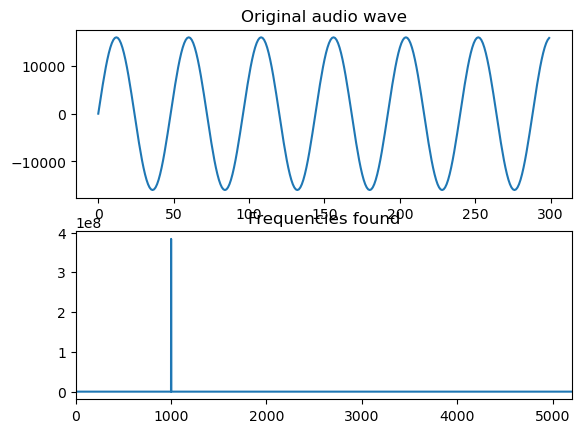

In [7]:
plt.subplot(2,1,1)
plt.plot(data[:300])
plt.title("Original audio wave")

plt.subplot(2,1,2)
plt.plot(frequencies)

plt.title("Frequencies found")
plt.xlim(0,5200)

plt.show()

In [23]:
##add noise to the signal
noise = 100
sine_noise = [np.sin(2 * np.pi * noise * x1/  sample_rate) for x1 in range(num_samples)]
sine_noise = np.array(sine_noise)
combined_signal = sine_wave + sine_noise

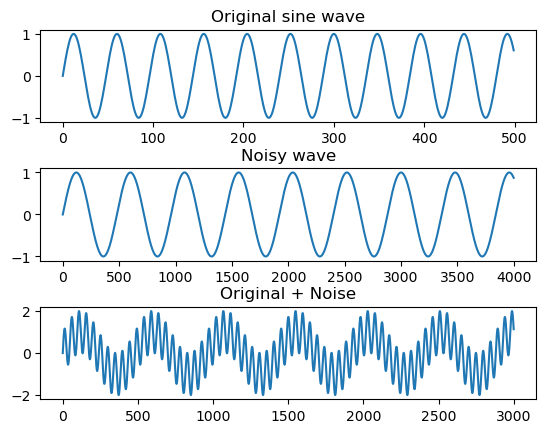

In [24]:
plt.subplot(3,1,1)
plt.title("Original sine wave")

# Need to add empty space, else everything looks scrunched up!
plt.subplots_adjust(hspace=.5)
plt.plot(sine_wave[:500])

plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(sine_noise[:4000])

plt.subplot(3,1,3)
plt.title("Original + Noise")
plt.plot(combined_signal[:3000])

plt.show()

In [25]:
##write noisy plot to listen to (it doesn't sound any different)
wave_obj.write_wave('./noisy_plot.wav', combined_signal, num_channels, sample_width, compress_type, compress_name)

(0.0, 1200.0)

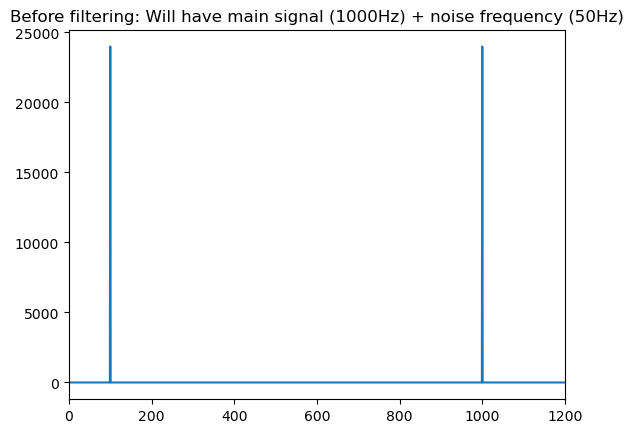

In [29]:
##get fft of noisy data
data_fft = np.fft.fft(combined_signal)
freq = (np.abs(data_fft[:len(data_fft)]))

plt.plot(freq)
plt.title("Main signal (1000Hz) + noise frequency (50Hz)")
plt.xlim(0,1200)

In [28]:
freq

array([3.23228620e-13, 9.13774241e-12, 1.26193837e-12, ...,
       6.47912537e-12, 1.26193837e-12, 9.13774241e-12])